# Extending the functionality of a project

As part of this session, we will teach you how to take an existing project and add some rule based functionality to it. For this session we will demonstrate how to send a SMS notification to your phone number once your AWS DeepLens detects a hotdog. 

This session demonstrates the building blocks capabilities of your AWS DeepLens to extend the functionality of the projects to interact with other AWS services. For example, you can build a dashboard and search interface for all objects and faces detected by AWS DeepLens by integrating your AWS DeepLens with Amazon ElasticSearch or build anomaly detection models on the number of people walking in front of your store by integrating AWS DeepLens with Amazon Kinesis Analytics or use celebrity recognition and face search API to identify the VIP around you by integrating AWS DeepLens with Amazon Rekognition.

In this session you will learn the following:

1. Create a lambda function
2. Create a IoT rule
3. Integrate the IoT rule with AWS DeepLens
4. Trigger the lambda function when a hotdog is detected

## DeepLens SMS notification flow overview

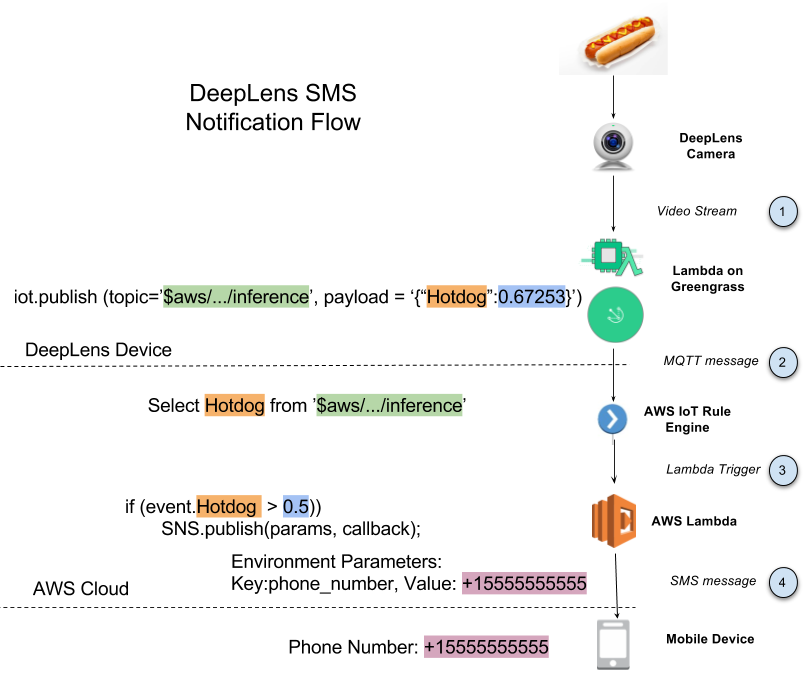

## Step 1- Create your Lambda function

In the first step you will create an AWS Lambda function that will run in the cloud and filter the messages that are coming from your DeepLens device for ones with high enough (>0.5) probability for a Hotdog. You can play with the probability as part of this session. During this process you will also create a rule in the AWS IoT rule engine to get messages from the Lambda function that you deployed to the device using AWS Greengrass. 

1. Login to Lambda console (https://console.aws.amazon.com/lambda/home?region=us-east-1#/functions). Make sure you are on US East (N. Virginia) 

2. Click on Create function

3. In the blueprints search bar, search for "iot-button-email"

4. Choose the template

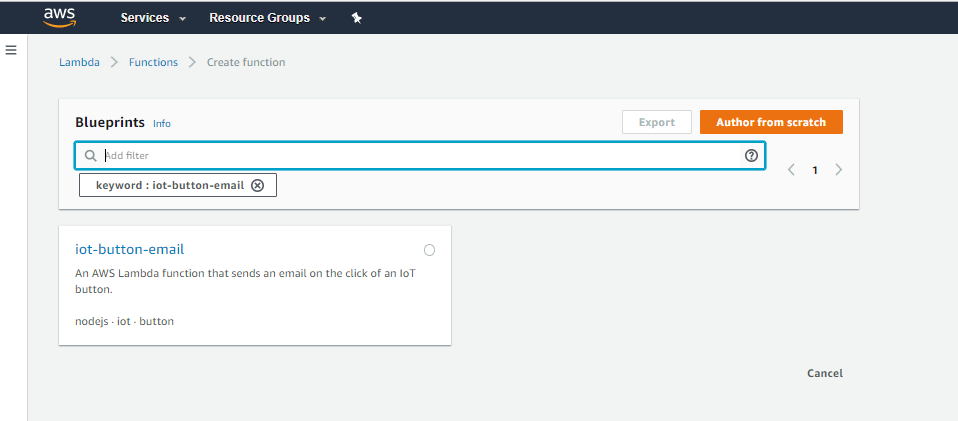



### Step 2- Name your lambda function and attach policies

1. Give the lambda function a name: your-name_hotdog_notifier

2. Keep “Create a new Role from template(s)” value in the Role field

3. Give your new role the same name as your lambda function name. For example: “your-name_hotdog_notifier”

4. In the policy templates, search for “SNS Publish policy”. Add the policy

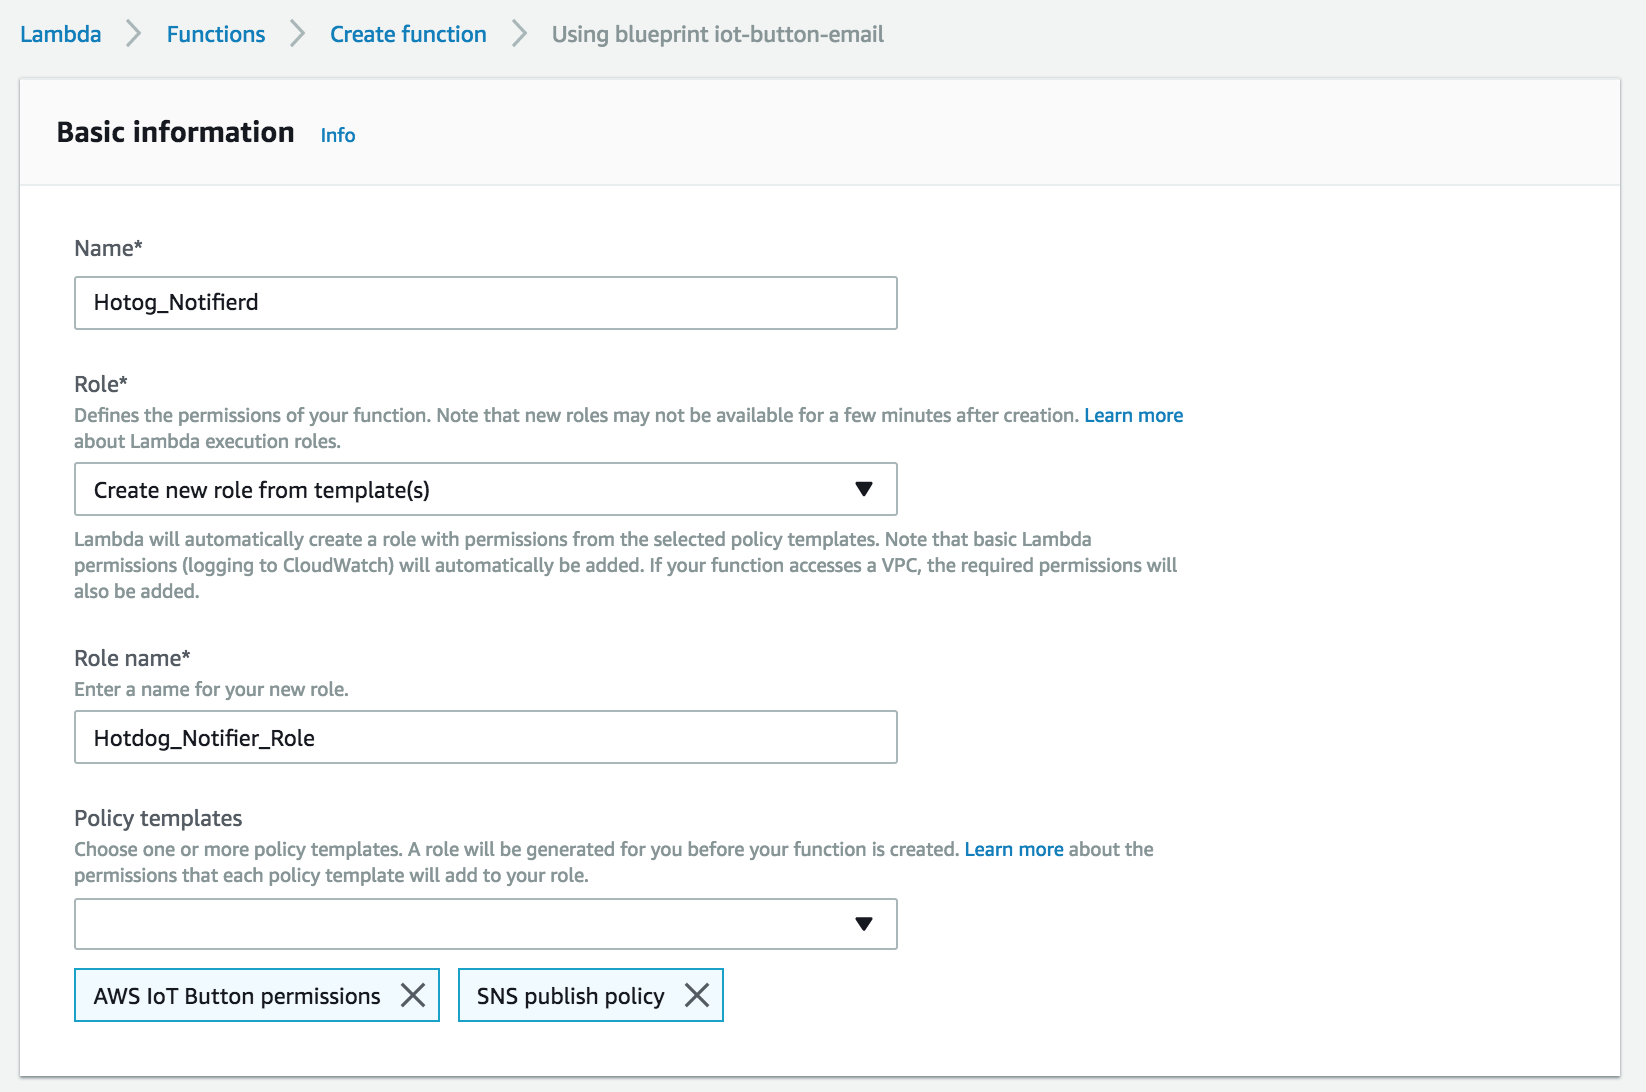

### Step 3- Create IoT rule

1. In the “aws-iot” section switch to use “Custom IoT Rule”

2. Choose “Create a new rule”

3. Give it a name: yourname_search_hotdogs and a description

4. In the Rule query statement put the SELECT query below. Replace " KJHFD-DKJO87-LJLKD/inference" with the IoT topic for your AWS DeepLens. You can find it by navigating to Devices in your AWS DeepLens and choosing your device name. Scroll down to the bottom of the device detail page to find your IoT topic. The below query can catch messages from the AWS DeepLens device in the following JSON format:  { “Hotdog” : 0.5438 }

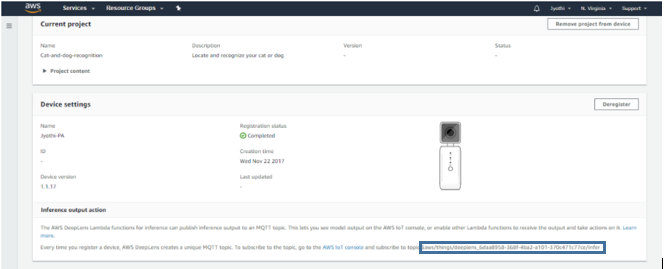
    

In [ ]:
Select Hotdog from '/$aws/deeplens/KJHFD-DKJO87-LJLKD/inference'

### Step 4- Enable Trigger and change environment variables

1. Enable trigger in the checkbox

2. Change the environment parameter from "email" to "phone_number", and put your phone number as the Value. Please note that the phone number format should include the international country code (for example, for US **+1**5555555555). You can read more on the international support for SMS in AWS SNS FAQ:  https://aws.amazon.com/sns/faqs/#sms-related-questions

If you do not wish to use phone number, you can keep the environment variable as email and provide your email address. Please include your full email (for example: jyothi@ xx.com)

3. Click the Create function button

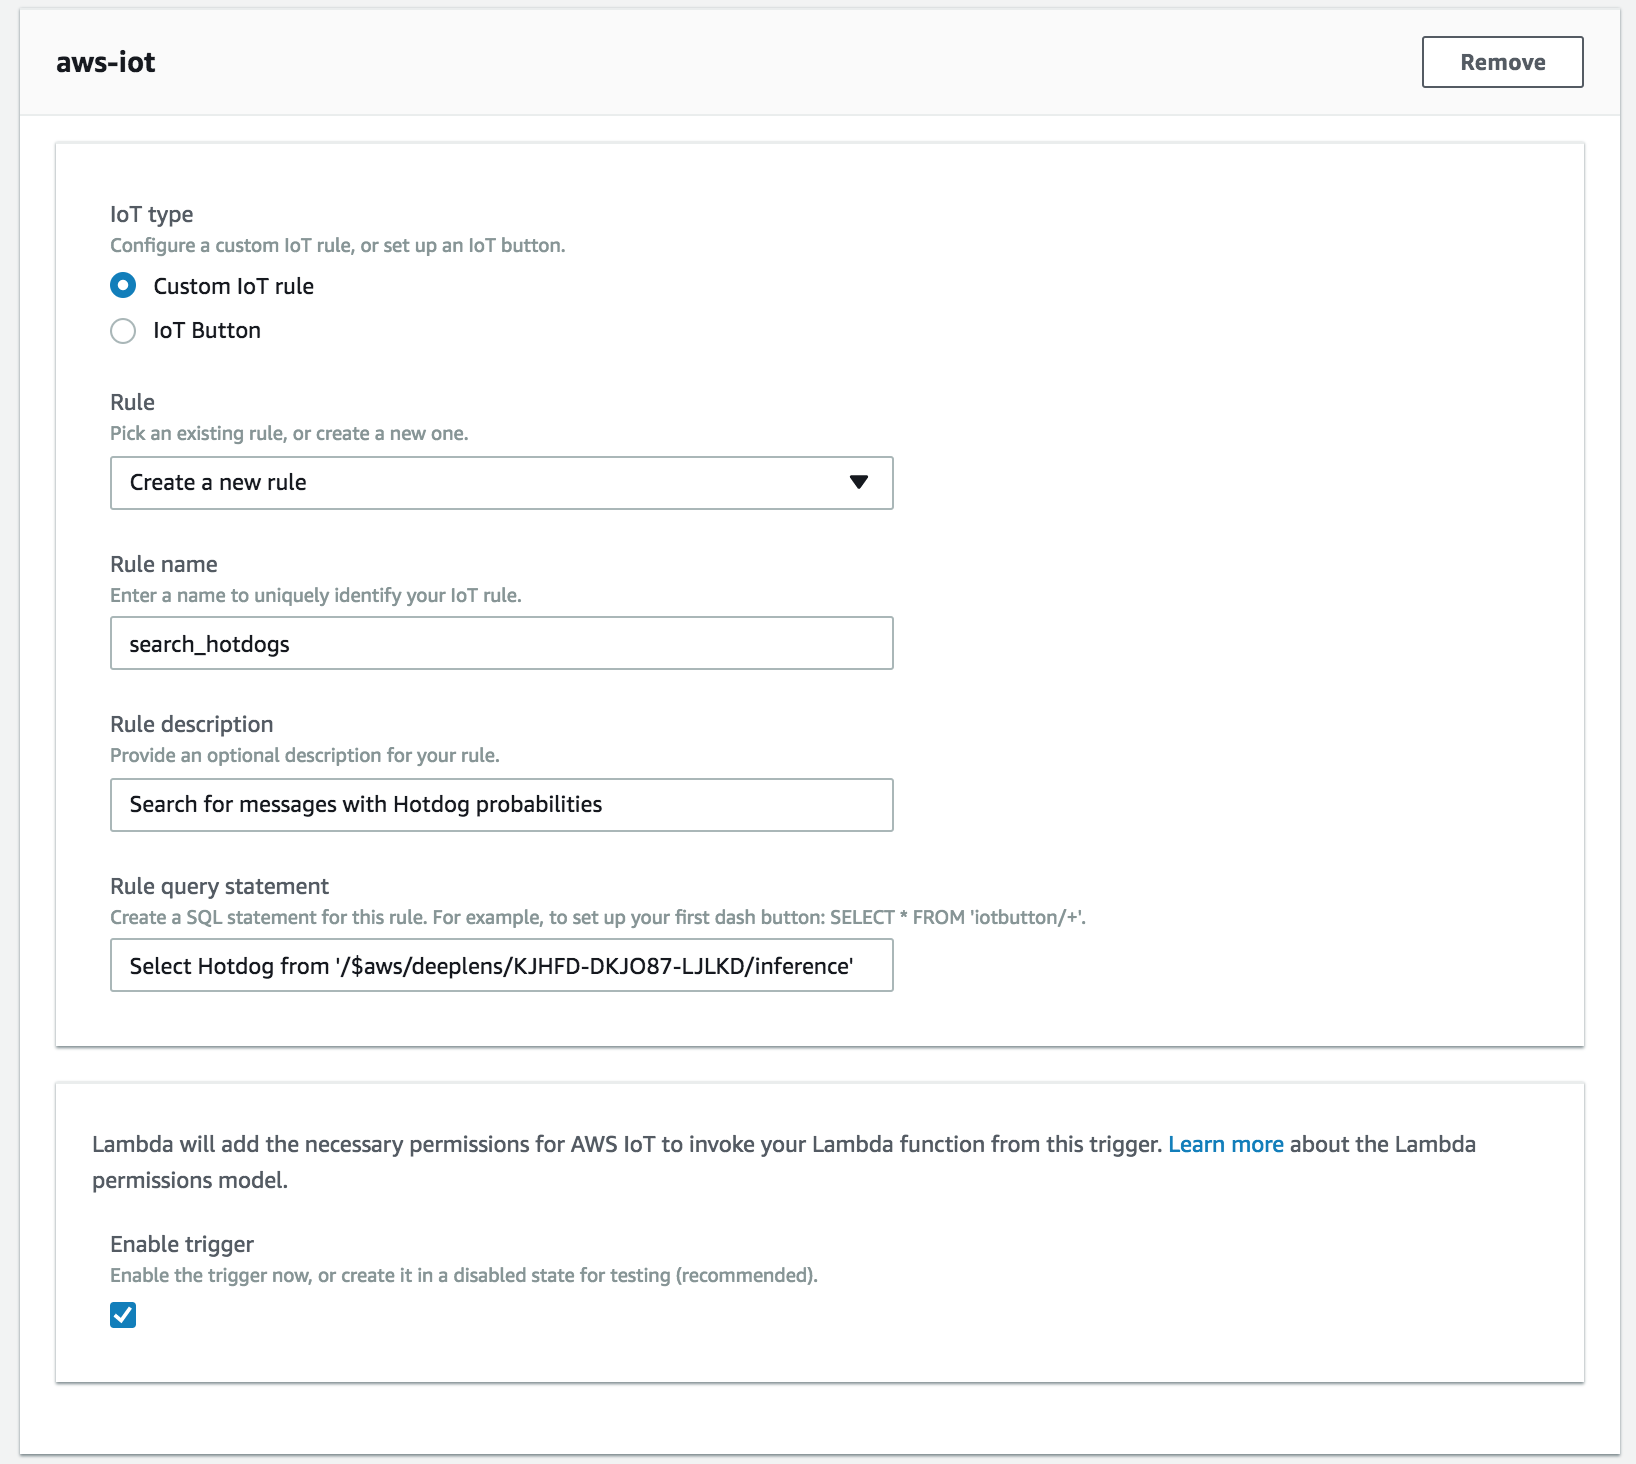

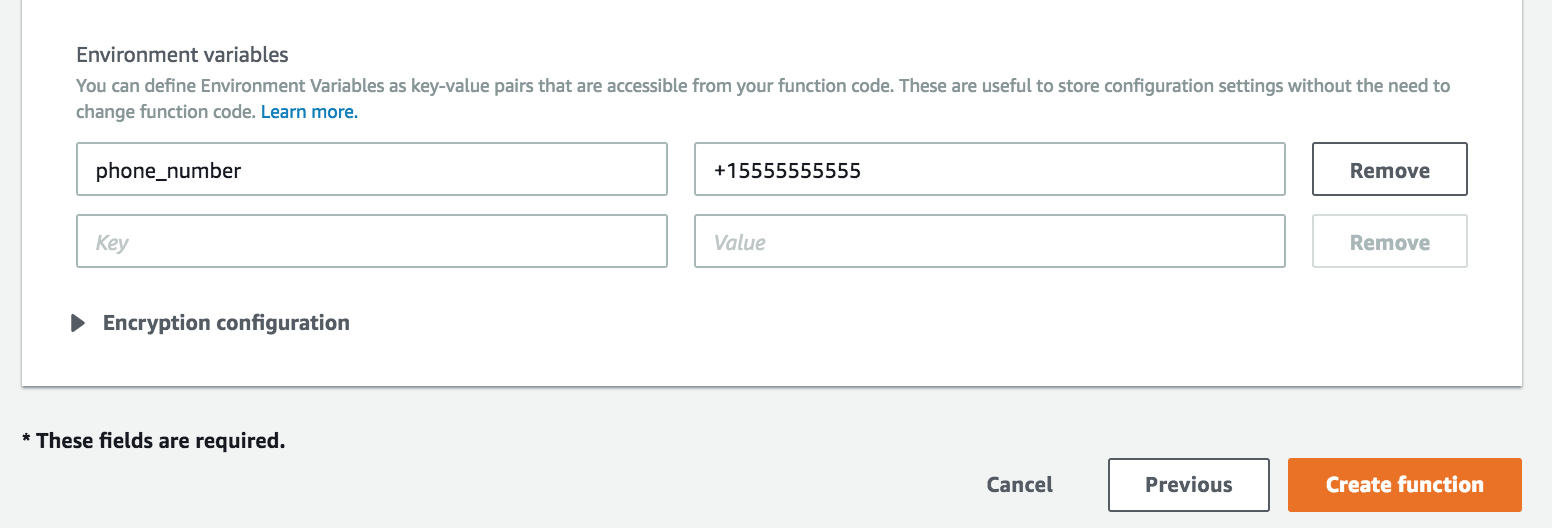

### Step 5- Change configuration

1. Switch to the “Configuration” tab of the Lambda function that you just created. You can find configuration tab on the left (configuration, triggers and monitoring)

2. In the lambda function code, remove all the existing code and copy paste the code below

In [ ]:
'use strict';

/**
 * This is a sample Lambda function that sends an SMS Notification When your
 * Deep Lens device detect a Hot Dog
 * 
 * Follow these steps to complete the configuration of your function:
 *
 * Update the phone number environment variable with your phone number.
 */

const AWS = require('aws-sdk');

const phone_number = process.env.phone_number;
const SNS = new AWS.SNS({ apiVersion: '2010-03-31' });

exports.handler = (event, context, callback) => {
    console.log('Received event:', event);

    // publish message
    const params = {
        Message: `Your DeepLens device just identified a Hot Dog. Congratulations!`,
        PhoneNumber: phone_number
    };
    if (event.Hotdog > 0.50)
        SNS.publish(params, callback);
};

If you choose email, please replace "const phone_number = process.env.phone_number;" **with** 
"const email  = process.env.email;"

Click “Save”. 

### Step 6- Test your configuration

1. In the IoT Console (https://console.aws.amazon.com/iotv2/home?region=us-east-1#/test) select the “Test” option

2. Choose Publish to a Topic and Publish to the IoT topic of your AWS DeepLens ( $aws/deeplens/KJHFD-DKJO87-LJLKD/inference )

3. Paste the following message in the code block

In [ ]:
{
    "Hotdog": 0.68725
}

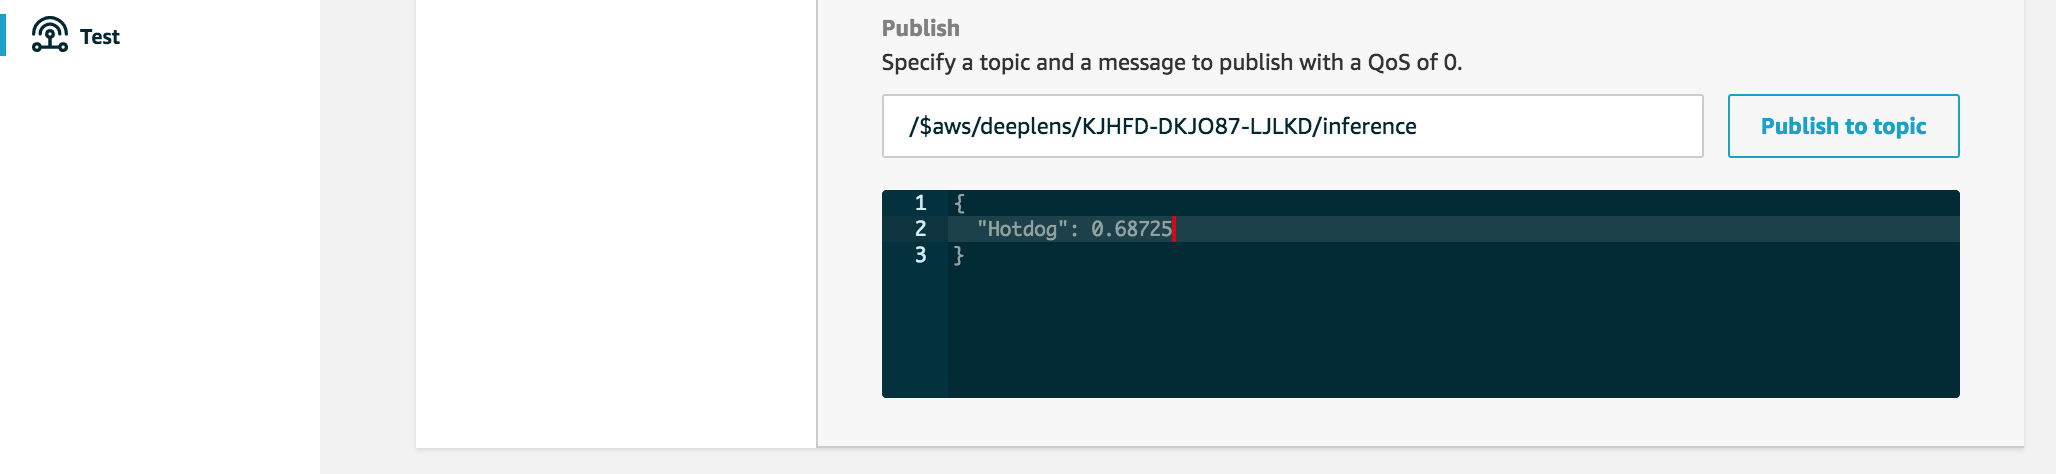

You should receive a message on your phone: "Congratulations! Your DeepLens just detected a Hotdog". This is the message you defined in your lambda function

### Step 7- Test with Hotdog project

1. If you have not already deployed a Hotdog project, go to AWS DeepLens console and choose Projects -> Create a project template -> Hotdog or Not hotdog -> deploy to device

2. Show your DeepLens a real hotdog and see it detect and send messages to you when the confidence score is greater than 0.50 

3. Feel free to play around with the probablity for trigerring the lambda function.

### Step 8- Disable the IoT rule

1. Go to IoT console (https://console.aws.amazon.com/iotv2/home?region=us-east-1#/test) and choose Rule

2. Find the rule that you just created and disable it (Unless you want DeepLens to keep pinging you when it detects a hotdog throughout the day ;) )